# data input

In [1]:
from pandas import Series,DataFrame
import numpy as np
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')  # link google drive

Mounted at /content/gdrive


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [122]:
import json
from pandas import json_normalize
with open("/content/gdrive/My Drive/機器學習概論/hw5/train.json") as f:
  data = json.load(f)

df = json_normalize(data)
DataFrame(df)

,id,cuisine,ingredients
0,42302,southern_us,"[egg whites, pecans, agave nectar, ground cinn..."
1,43202,greek,"[large egg whites, whole milk, bread crumb fre..."
2,31619,cajun_creole,"[sugar, vegetable oil, yeast, eggs, evaporated..."
3,30920,korean,"[honey, rice vinegar, brown sugar, ginger, gar..."
4,46567,italian,"[mushroom caps, asiago, large shrimp, fat free..."
...,...,...,...
29769,24516,greek,"[mayonaise, mahimahi fillet, tomatoes, extra-v..."
29770,49253,mexican,"[neutral oil, ground black pepper, tomatillos,..."
29771,4861,french,"[tomatoes, chopped fresh thyme, fresh mushroom..."
29772,529,mexican,"[unsalted butter, chees fresco queso, lime, ch..."


# data visulation

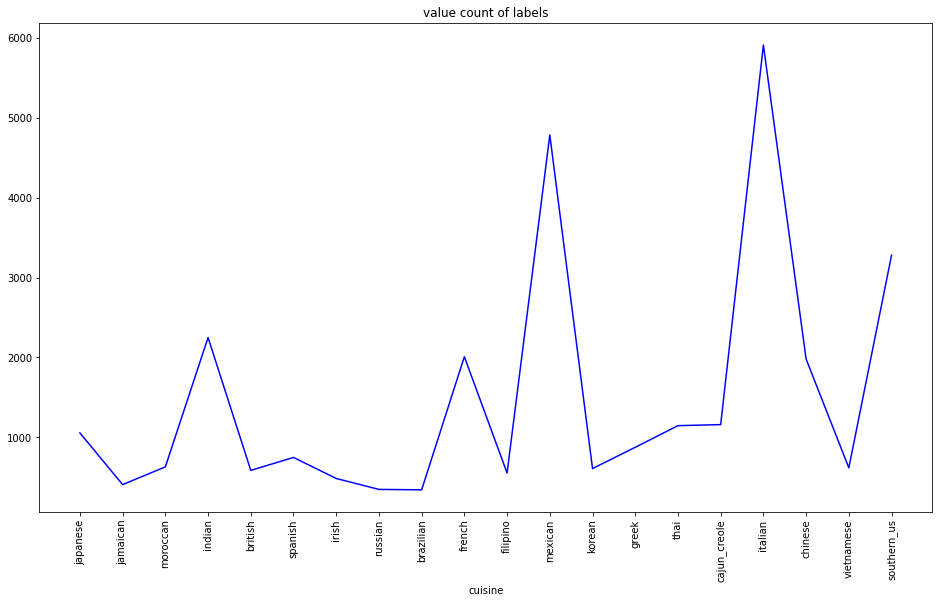

In [123]:
import matplotlib.pyplot as plt
df_count1 = df['cuisine'].value_counts(sort=False).rename_axis('cuisine').reset_index(name='counts')
plt.figure(figsize=(16,9))
plt.plot(df_count1.cuisine, df_count1.counts, color='b')
plt.title('value count of labels') # 設定圖表標題
plt.xlabel('cuisine') # 設定x軸標題
plt.xticks(df_count1.cuisine, rotation='vertical') # 設定x軸label以及垂直顯示
plt.show()

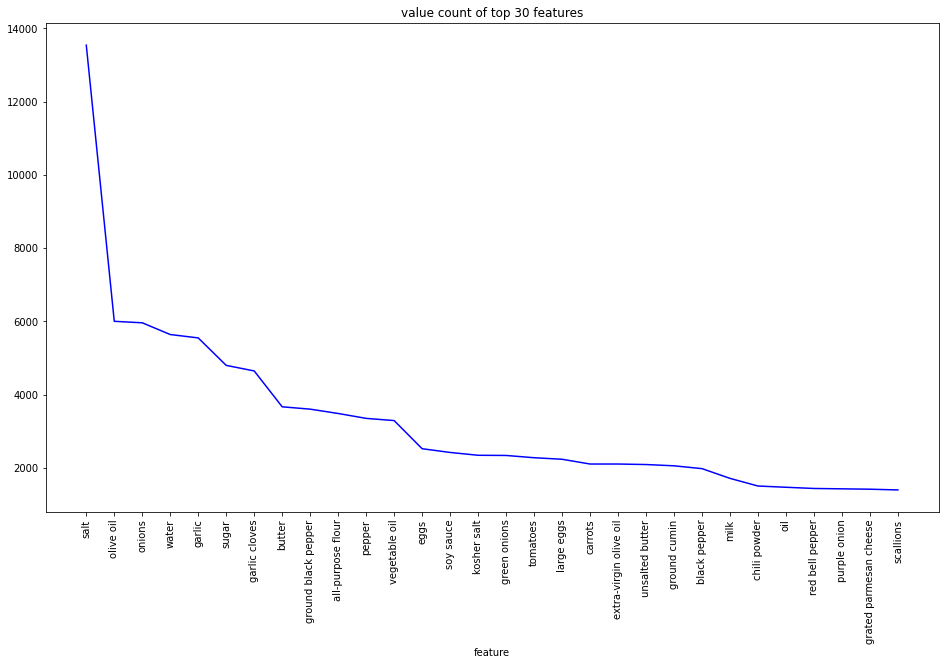

In [124]:
feature_total = []
for i in range(df.shape[0]):
  list_tmp = df['ingredients'].iloc[i]
  for j in range(len(list_tmp)):
    feature_total.append(list_tmp[j])

df_feature = DataFrame(feature_total, columns=['feature'])
df_count2 = df_feature['feature'].value_counts(sort=True).rename_axis('feature').reset_index(name='counts')
df_count2 = df_count2.loc[0:29]
plt.figure(figsize=(16,9))
plt.plot(df_count2.feature, df_count2.counts, color='b')
plt.title('value count of top 30 features') # 設定圖表標題
plt.xlabel('feature') # 設定x軸標題
plt.xticks(df_count2.feature, rotation='vertical') # 設定x軸label以及垂直顯示
plt.show()

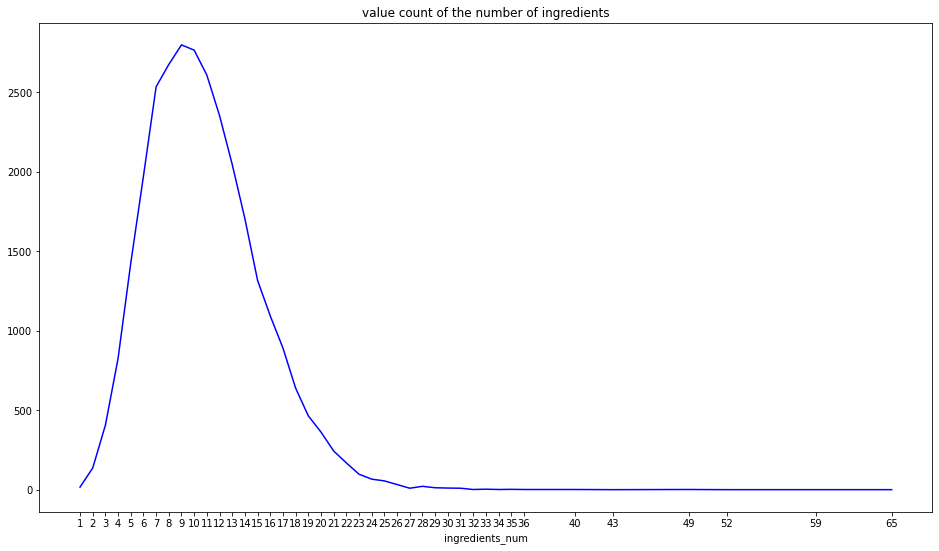

In [125]:
count3 = []
for i in range(df.shape[0]):
  tmp_list = df['ingredients'].iloc[i]
  count3.append(len(tmp_list))

df_count3_tmp = DataFrame(count3,columns=['ingredients_num'])
df_count3 = df_count3_tmp['ingredients_num'].value_counts(sort=False).rename_axis('ingredients_num').reset_index(name='counts')
df_count3 = df_count3.sort_values(by='ingredients_num')
plt.figure(figsize=(16,9))
plt.plot(df_count3.ingredients_num, df_count3.counts, color='b')
plt.title('value count of the number of ingredients') # 設定圖表標題
plt.xlabel('ingredients_num') # 設定x軸標題
plt.xticks(df_count3.ingredients_num)
plt.show()

# data preprocessing

In [126]:
df_tmp = df.copy()
df_tmp = df_tmp.drop(['id'], axis=1)
df_tmp = df_tmp.drop(['ingredients'], axis=1)
for i in range(df_count2.shape[0]):
  df_tmp[df_count2['feature'].loc[i]] = 0
print(df_tmp)

            cuisine  salt  ...  grated parmesan cheese  scallions
0       southern_us     0  ...                       0          0
1             greek     0  ...                       0          0
2      cajun_creole     0  ...                       0          0
3            korean     0  ...                       0          0
4           italian     0  ...                       0          0
...             ...   ...  ...                     ...        ...
29769         greek     0  ...                       0          0
29770       mexican     0  ...                       0          0
29771        french     0  ...                       0          0
29772       mexican     0  ...                       0          0
29773       italian     0  ...                       0          0

[29774 rows x 31 columns]


In [127]:
for i in range(df.shape[0]):
  list_tmp = df['ingredients'].iloc[i]
  for j in range(df_count2.shape[0]):
    df_tmp[df_count2['feature'].loc[j]].iloc[i] = list_tmp.count(df_count2['feature'].loc[j])

In [138]:
DataFrame(df_tmp)

,cuisine,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,pepper,vegetable oil,eggs,soy sauce,kosher salt,green onions,tomatoes,large eggs,carrots,extra-virgin olive oil,unsalted butter,ground cumin,black pepper,milk,chili powder,oil,red bell pepper,purple onion,grated parmesan cheese,scallions
0,southern_us,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,greek,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,cajun_creole,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,korean,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,italian,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,greek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
29770,mexican,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29771,french,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
29772,mexican,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [129]:
from sklearn.utils import shuffle #shuffle the data
df_shuff = shuffle(df_tmp)

# validation

In [131]:
from sklearn.model_selection import train_test_split
X = df_shuff.drop(["cuisine"], axis=1)
y = df_shuff["cuisine"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# ANN

In [133]:
import tensorflow as tf
initializer = tf.keras.initializers.Zeros()
model_ANN = tf.keras.models.Sequential([  
    tf.keras.layers.Dense(50, activation='linear'),
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(250, activation='relu'),  
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(700, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(700, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')    
])

model_ANN.compile(loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])

# result

In [134]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.metrics import accuracy_score
y_train_dum = pd.get_dummies(y_train)
y_test_dum = pd.get_dummies(y_test)
model_ANN.fit(X_train, y_train_dum, batch_size = 256, epochs = 10, verbose = 1) 

Epoch 1/10
82/82 [==============================] - 11s 120ms/step - loss: 2.4152 - accuracy: 0.2718
Epoch 2/10
82/82 [==============================] - 10s 118ms/step - loss: 2.1341 - accuracy: 0.3639
Epoch 3/10
82/82 [==============================] - 10s 123ms/step - loss: 2.0788 - accuracy: 0.3769
Epoch 4/10
82/82 [==============================] - 10s 118ms/step - loss: 2.0442 - accuracy: 0.3842
Epoch 5/10
82/82 [==============================] - 10s 116ms/step - loss: 2.0190 - accuracy: 0.3856
Epoch 6/10
82/82 [==============================] - 10s 121ms/step - loss: 1.9986 - accuracy: 0.3930
Epoch 7/10
82/82 [==============================] - 12s 143ms/step - loss: 2.0015 - accuracy: 0.3903
Epoch 8/10
82/82 [==============================] - 10s 121ms/step - loss: 1.9711 - accuracy: 0.4003
Epoch 9/10
82/82 [==============================] - 10s 117ms/step - loss: 1.9556 - accuracy: 0.4051
Epoch 10/10
82/82 [==============================] - 10s 118ms/step - loss: 1.9365 - accura

In [135]:
loss, accuracy = model_ANN.evaluate(X_test, y_test_dum)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

280/280 [==============================] - 6s 19ms/step - loss: 2.0650 - accuracy: 0.3835

Loss: 2.07, Accuracy: 38.35%


In [136]:
from sklearn.metrics import classification_report

y_pred = model_ANN.predict(X_test, batch_size=64, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test_dum.values, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00       370
           3       0.35      0.71      0.47       594
           4       0.27      0.05      0.09       151
           5       0.33      0.05      0.08       613
           6       0.00      0.00      0.00       265
           7       0.48      0.35      0.41       679
           8       0.00      0.00      0.00       139
           9       0.46      0.67      0.55      1771
          10       0.50      0.01      0.02       127
          11       0.00      0.00      0.00       298
          12       0.35      0.16      0.22       187
          13       0.35      0.67      0.46      1426
          14       0.40      0.19      0.26       178
          15       0.00      0.00      0.00       103
          16       0.33      0.51      0.40      1001
          17       0.30    

In [137]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
c = confusion_matrix(y_test_bool, y_pred_bool)
print('confusion matrix')
print(c)

confusion matrix
[[   0    0    0    2    2    0    0    9    0   30    0    0    0   42
     4    0   20    1    0    0]
 [   0    0    0    1    0    8    0    5    0   28    0    0    1   27
     0    0   89    0    0    1]
 [   0    0    0   27    3    2    0   18    0   83    0    0    3  134
     0    0   95    1    3    1]
 [   0    0    0  422    5    1    0   15    0   31    0    0   16   76
     0    0   17    0    6    5]
 [   0    0    0   50    8    1    0   13    0   16    0    0    4   45
     0    0   12    0    0    2]
 [   0    0    0   10    0   28    0    5    0  259    0    0    0   89
     2    0  210    4    3    3]
 [   0    0    0    3    0    2    0    2    0  147    0    0    1   79
     3    0   26    1    0    1]
 [   0    0    0   18    1    0    0  240    0   82    0    0    0  276
     9    0   50    1    2    0]
 [   0    0    0    7    0    4    0    3    0   27    0    0    0   23
     0    0   73    0    0    2]
 [   0    0    0   22    2   15    0  

In [104]:
with open("/content/gdrive/My Drive/機器學習概論/hw5/test.json") as f:
  data = json.load(f)

df_test = json_normalize(data)
DataFrame(df_test)

,id,ingredients
0,14,"[olive oil, balsamic vinegar, toasted pine nut..."
1,22,"[canola, jalapeno chilies, salsa, onions, cide..."
2,24,"[large eggs, vanilla extract, firmly packed li..."
3,37,"[queso fresco, margarine, chicken breasts, ext..."
4,40,"[active dry yeast, white sugar, warm water, sa..."
...,...,...
9995,49692,"[black pepper, vegetable oil, garlic cloves, u..."
9996,49693,"[crescent rolls, Nutella]"
9997,49697,"[fennel seeds, bread crumbs, salt, eggs, crush..."
9998,49709,"[shallots, salt, red, basil, tomato ketchup, p..."


In [106]:
df_test_tmp = df_test.copy()
df_test_tmp = df_test_tmp.drop(['id'], axis=1)
df_test_tmp = df_test_tmp.drop(['ingredients'], axis=1)
for i in range(df_count2.shape[0]):
  df_test_tmp[df_count2['feature'].loc[i]] = 0

for i in range(df_test.shape[0]):
  list_tmp = df_test['ingredients'].iloc[i]
  for j in range(df_count2.shape[0]):
    df_test_tmp[df_count2['feature'].loc[j]].iloc[i] = list_tmp.count(df_count2['feature'].loc[j])

In [121]:
cuisine_type = y_train_dum.columns
test_pred = model_ANN.predict(df_test_tmp, batch_size=64, verbose=0)
test_pred_bool = np.argmax(test_pred, axis=1)

In [116]:
cuisine_list = []
for i in range(len(test_pred_bool)):
  cuisine_list.append(cuisine_type[test_pred_bool[i]])

In [117]:
result = pd.DataFrame({'Id': df_test['id'], 'Category': cuisine_list})
DataFrame(result)

,Id,Category
0,14,italian
1,22,mexican
2,24,southern_us
3,37,italian
4,40,mexican
...,...,...
9995,49692,southern_us
9996,49693,mexican
9997,49697,southern_us
9998,49709,southern_us


In [120]:
result.to_csv("/content/gdrive/My Drive/機器學習概論/hw5/result.csv",index=0)